In [46]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import random
import PIL
import pickle 

In [47]:
data = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/"
categories = ['REAL', 'FAKE']

In [48]:
img_size = 48


In [50]:
img_size = 48
training_data = []

i = 0
for category in categories:
    path = os.path.join(data,category)
    classes = categories.index(category)
    for img in os.listdir(path):
        i = i + 1
        img_array = cv.imread(os.path.join(path,img))
        new_array = cv.resize(img_array, (48,48))
        new_array = new_array/255
        training_data.append([new_array, classes])

In [51]:
len(training_data), training_data[0][0].shape


(100000, (48, 48, 3))

In [52]:
random.shuffle(training_data)


In [53]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

In [54]:
X_train.shape


(100000, 48, 48, 3)

In [55]:
y_train.shape


(100000,)

In [56]:
X_train[0].shape


(48, 48, 3)

In [57]:
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out, protocol=4)
pickle_out.close()

In [58]:
pickle_in = open("X_train.pickle", "rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

In [59]:
X_train.shape


(100000, 48, 48, 3)

In [60]:
y_train.shape


(100000,)

Model

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential

In [63]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (48,48,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,089 (1.56 MB)

 Trainable params: 409,089 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.fit(X_train, y_train, epochs=15)


Epoch 1/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 218s 69ms/step - accuracy: 0.7484 - loss: 0.4956
Epoch 2/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 213s 68ms/step - accuracy: 0.8744 - loss: 0.2982
Epoch 3/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 273s 72ms/step - accuracy: 0.8985 - loss: 0.2483
Epoch 4/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 213s 68ms/step - accuracy: 0.9078 - loss: 0.2278
Epoch 5/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 213s 68ms/step - accuracy: 0.9156 - loss: 0.2091
Epoch 6/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 213s 68ms/step - accuracy: 0.9222 - loss: 0.1978
Epoch 7/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 215s 69ms/step - accuracy: 0.9259 - loss: 0.1858
Epoch 8/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 261s 69ms/step - accuracy: 0.9265 - loss: 0.1830
Epoch 9/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 263s 69ms/step - accuracy: 0.9324 - loss: 0.1721
Epoch 10/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 216s 69ms/step - accuracy: 0.9343 - loss: 0.1669
Epoch 11/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 216s 69ms/step - accuracy: 0.9366 - loss: 0.16

In [66]:
model.save("AIGeneratedModel.h5")


In [67]:
model_new = keras.models.load_model("AIGeneratedModel.h5")


In [68]:
data = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test"
categories = ['REAL', 'FAKE']

img_size = 48
testing_data = []

i = 0
for category in categories:
    path = os.path.join(data,category)
    classes = categories.index(category)
    for img in os.listdir(path):
        i = i + 1
        img_array = cv.imread(os.path.join(path,img))
        new_array = cv.resize(img_array, (48,48))
        new_array = new_array/255
        testing_data.append([new_array, classes])
        
random.shuffle(testing_data)

X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [69]:
model_new.evaluate(X_test, y_test)


625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9299 - loss: 0.1835


[0.1873568743467331, 0.9278500080108643]

In [71]:
y_pred = model_new.predict(X_test)


625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step


In [72]:
X_test.shape


(20000, 48, 48, 3)

In [73]:
y_test.shape


(20000,)

In [74]:
y_pred.shape


(20000, 1)

In [75]:
y_predicted = []

for arr in y_pred:
    if arr[0] <= 0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)

In [76]:
y_predicted.shape


(20000,)

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10000
           1       0.97      0.88      0.92     10000

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000



In [78]:
def find_out(path_img):
    img_arr = cv.imread(path_img)
    plt.imshow(img_arr)
    new_arr = cv.resize(img_arr, (48,48))
    new_arr = new_arr/255
    test = []
    test.append(new_arr)
    test = np.array(test).reshape(-1, img_size, img_size, 3)
    y = model_new.predict(test)
    if y[0] <= 0.5:
        print("The given image is Real.")
    else:
        print("The given image is AI Generated.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
The given image is AI Generated.


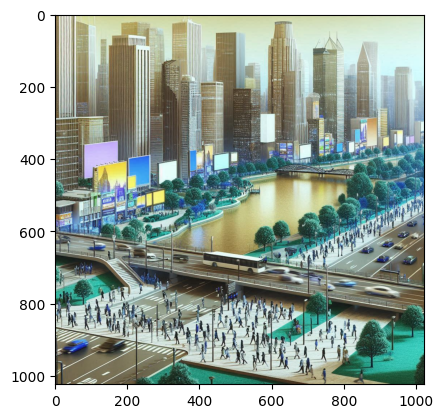

In [79]:
path_img = '/kaggle/input/checking/check/Designer.jpeg'
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The given image is AI Generated.


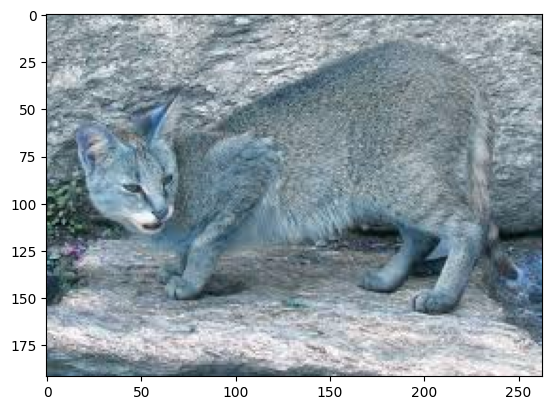

In [81]:
path_img = '/kaggle/input/checking/check/real3.jpg'
find_out(path_img)